In [241]:
import openmc
import numpy as np
import matplotlib.pyplot as plt

In [79]:
geom = openmc.Geometry.from_xml()

In [80]:
uni_base = geom.get_all_universes()[1]

In [22]:
lat.find_element((68,32,0))

((18, 13, 1), (-0.257000000000005, 0.6342919257352015, 0.0))

In [81]:
lat = geom.get_all_lattices()[5]

In [90]:
unis = lat.universes

In [83]:
lat

HexLattice
	ID             =	5
	Name           =	
	Orientation    =	x
	# Rings        =	23
	# Axial        =	3
	Center         =	[0.0, 0.0, 0.0]
	Pitch          =	[2.786, 150.0]
	Outer          =	4
	Universes      
                      7 7 7 7 7 7 7 7 7 7 8 8 8 7 7 7 7 7 7 7 7 7 7
                     7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 7 7 7 7 7 7 7 7 7
                    7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 7 7 7 7 7 7 7 7
                   7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 7 7 7 7 7 7 7
                  7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 7 7 7 7 7 7
                 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 7 7 7 7 7
                7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 7 7 7 7
               7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 7 7 7
              7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 7 7
             7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 7
            8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 

In [104]:
with open('lat.txt','w') as f:
    f.write(lat.show_indices(8, orientation='x'))

In [105]:
for i in range(28,35):
    if uni_base == unis[1][-8][i]:
        print('BASE', i)
        unis[1][-8][i] = uni_base.clone()

BASE 28
BASE 29
BASE 30
BASE 31
BASE 32
BASE 33
BASE 34


In [103]:
with open('lat.txt', 'w') as f:
    f.write(str(lat))

In [116]:
[6, 7, 8, 1,]

uni_standards = [geom.get_all_universes()[1],
                 geom.get_all_universes()[4],
                 geom.get_all_universes()[6],
                 geom.get_all_universes()[7],
                 geom.get_all_universes()[8],
                 geom.get_all_universes()[9]]

bins = []
for v in geom.get_all_universes().values():
    if v not in uni_standards:
        bins.append(v)

In [117]:
len(bins)

36

In [119]:
uni_filter = openmc.UniverseFilter(bins)

In [120]:
uni_filter

UniverseFilter
	Bins           =	[51 52 53 54 55 56 57 39 40 41 42 43 44 45 46 47 48 49 50 26 28 29 30 31
 32 33 34 35 36 37 38  2  3 10 17 25]
	ID             =	1

In [121]:
tally = openmc.Tally()

In [122]:
tally.scores = ['heating', 'heating-local', 'kappa-fission']
tally.filters = [uni_filter]

In [123]:
tally

Tally
	ID             =	1
	Name           =	
	Filters        =	UniverseFilter
	Nuclides       =	
	Scores         =	['heating', 'heating-local', 'kappa-fission']
	Estimator      =	None

In [124]:
tallies = openmc.Tallies()
tallies.append(tally)

In [126]:
tallies.export_to_xml()

In [129]:
geom.export_to_xml()

In [131]:
mats = openmc.Materials()

for v in geom.get_all_materials().values():
    mats.append(v)

In [133]:
mats.export_to_xml()

In [251]:
sp = openmc.StatePoint('statepoint.10.h5')

In [157]:
engy = 0.
ind = 0
for elem, b in enumerate(uni_filter.bins):
    if sp.get_tally(scores=['kappa-fission']).mean[:,0,2] > engy:
        engy = sp.get_tally(scores=['kappa-fission']).mean[:,0,2]
        ind = elem
        max_uni = 
    
for elem in sp.get_tally(scores=['kappa-fission']).mean[:,0,2]):
    print(uni_filter[elem])

TypeError: 'UniverseFilter' object does not support indexing

In [161]:
sp.get_tally(scores=['kappa-fission']).mean[30,0,2]

86758.38079346444

In [160]:
uni_filter.bins[0]

51

In [162]:
86758.38079346444/7.8857e+07

0.0011001988510019967

In [163]:
0.0011001988510019967*5000

5.500994255009983

In [166]:
geom.get_all_universes()[38].bounding_box

(array([-1.39300186,        -inf,        -inf]),
 array([1.39300186,        inf,        inf]))

In [175]:
lat.find_point()

(1, 2, 100)

In [179]:
print(lat.show_indices(6, orientation='x'))

                              (0,20)      (0,21)      (0,22)      (0,23)      (0,24)      (0,25)

                        (0,19)      (1,16)      (1,17)      (1,18)      (1,19)      (1,20)      (0,26)

                  (0,18)      (1,15)      (2,12)      (2,13)      (2,14)      (2,15)      (1,21)      (0,27)

            (0,17)      (1,14)      (2,11)      (3, 8)      (3, 9)      (3,10)      (2,16)      (1,22)      (0,28)

      (0,16)      (1,13)      (2,10)      (3, 7)      (4, 4)      (4, 5)      (3,11)      (2,17)      (1,23)      (0,29)

(0,15)      (1,12)      (2, 9)      (3, 6)      (4, 3)      (5, 0)      (4, 0)      (3, 0)      (2, 0)      (1, 0)      (0, 0)

      (0,14)      (1,11)      (2, 8)      (3, 5)      (4, 2)      (4, 1)      (3, 1)      (2, 1)      (1, 1)      (0, 1)

            (0,13)      (1,10)      (2, 7)      (3, 4)      (3, 3)      (3, 2)      (2, 2)      (1, 2)      (0, 2)

                  (0,12)      (1, 9)      (2, 6)      (2, 5)      (2, 4)      (2, 3)

In [199]:
lat.universes[1][17][26]

Universe
	ID             =	38
	Name           =	
	Cells          =	[311, 312, 313, 314, 315, 316, 317, 318, 319, 320]

In [206]:
for i in range(100):
    for j in range(100):
        try:
            uni_ind = lat.get_universe_index((i,j,1))
        except:
            continue
        if uni_ind == (1,17,26):
            print((i,j,1))
            break

(1, 4, 1)


In [218]:
x_elem = []
y_elem = []
for x in np.linspace(5,12):
    for y in np.linspace(5,16):
        if lat.find_element((x,y,0))[0] == (1,4,1):
            x_elem.append(x)
            y_elem.append(y)
            
print(min(x_elem), max(x_elem))
print(min(y_elem), max(y_elem))

6.968968968968969 9.75075075075075
8.05005005005005 11.254254254254255


In [207]:
lat.get_universe_index((1,4,1))

(1, 17, 26)

In [216]:
9.714285714285715 - 7.0

2.7142857142857153

In [219]:
mesh = openmc.RectilinearMesh()
mesh.x_grid = [6.96, 9.751]
mesh.y_grid = [8.05, 11.255]
mesh.z_grid = np.linspace(-75,75, num=100)

In [220]:
mesh

<Element 'mesh' at 0x7fb6b72b61d8>


In [223]:
85725.9/8.00295e+07*5000

5.35589376417446

In [226]:
78382.5/7.28872e+07*5000

5.376972911567464

In [228]:
(5.501-5.51)/5.51*100

-0.16333938294009898

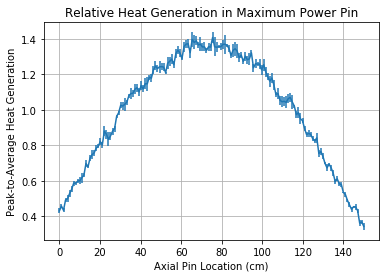

In [256]:
plt.errorbar(np.linspace(0,150,num=150), sp.tallies[3].mean[:,0,1]/np.mean(sp.tallies[3].mean[:,0,1]), yerr=sp.tallies[3].std_dev[:,0,1]/np.mean(sp.tallies[3].mean[:,0,1]))
plt.grid()
plt.ylabel('Peak-to-Average Heat Generation')
plt.xlabel('Axial Pin Location (cm)')
plt.title('Relative Heat Generation in Maximum Power Pin')
plt.savefig('maxpin.png', dpi=400)

In [261]:
src_str = sp.tallies[3].mean[:,0,2]/np.mean(sp.tallies[3].mean[:,0,2])
z_val = np.linspace(-74.5, 74.5, num=150)

with open('src.txt', 'w') as f:
    for i in range(150):
        f.write(src.format(str=src_str[i], z=z_val[i]))

In [259]:
src = """
<source strength="{str}">
    <space type="point">
      <parameters>0 0 {z}</parameters>
    </space>
</source>"""

In [268]:
sp.tallies[2].mean[0,0,2]/sp.tallies[1].mean[0,0,2]*5000

5.440335309290022